Importing packages:

In [2]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

We can see that overlap with the lithoprobe lines

In [73]:
montney = gpd.read_file("data/montney_AER_outline.shp")

lithoprobe = gpd.read_file("data/lithoprobe_lines.shp")

faults_bfsz = gpd.read_file("data/Mei_2009_faults_BFSZ.shp")
faults_montney = gpd.read_file("data/Mei_2009_faults_Montney.shp")
faults_debolt = gpd.read_file("data/Mei_2009_faults_Debolt.shp")

gravi_df = pd.read_csv("data/Canada_Gravity_2018.csv", sep=",")
gravi_gdf = gpd.GeoDataFrame(
    gravi_df, geometry=gpd.points_from_xy(gravi_df.X, gravi_df.Y), crs=4326)

lithoprobe = lithoprobe.to_crs(26711)
gravi_gdf_utm = gravi_gdf.to_crs(crs=26711) #  to have distance in meters
montney = montney.to_crs(26711)
gravi_gdf_utm['easting'] = gravi_gdf_utm.geometry.x
gravi_gdf_utm['northing'] = gravi_gdf_utm.geometry.y


Convert gravi points to geodataframe and get the points intersecting with lithoprobe

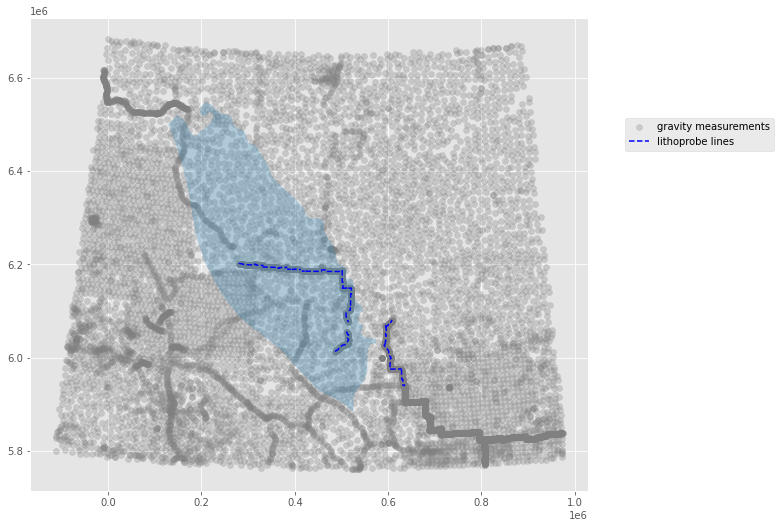

In [74]:
fig, ax = plt.subplots(figsize = (10, 10))
# ax.set_xlim(-122, -115) 
# ax.set_ylim(53, 58) 

gravi_gdf_utm.plot(ax = ax, color='grey', alpha=0.3, label='gravity measurements')
lithoprobe.plot(ax = ax, linestyle='dashed', color='blue', label='lithoprobe lines')
montney.plot(ax=ax, alpha=0.3)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))

plt.show()

Some gravity measurements are no directly on the lithoprobe profile, so we create 10m buffer

In [75]:
buffer = 200
lithoprobe['geometry'] = lithoprobe.geometry.buffer(buffer)

To get the points within th lithoprobe line, we use "overlay: method

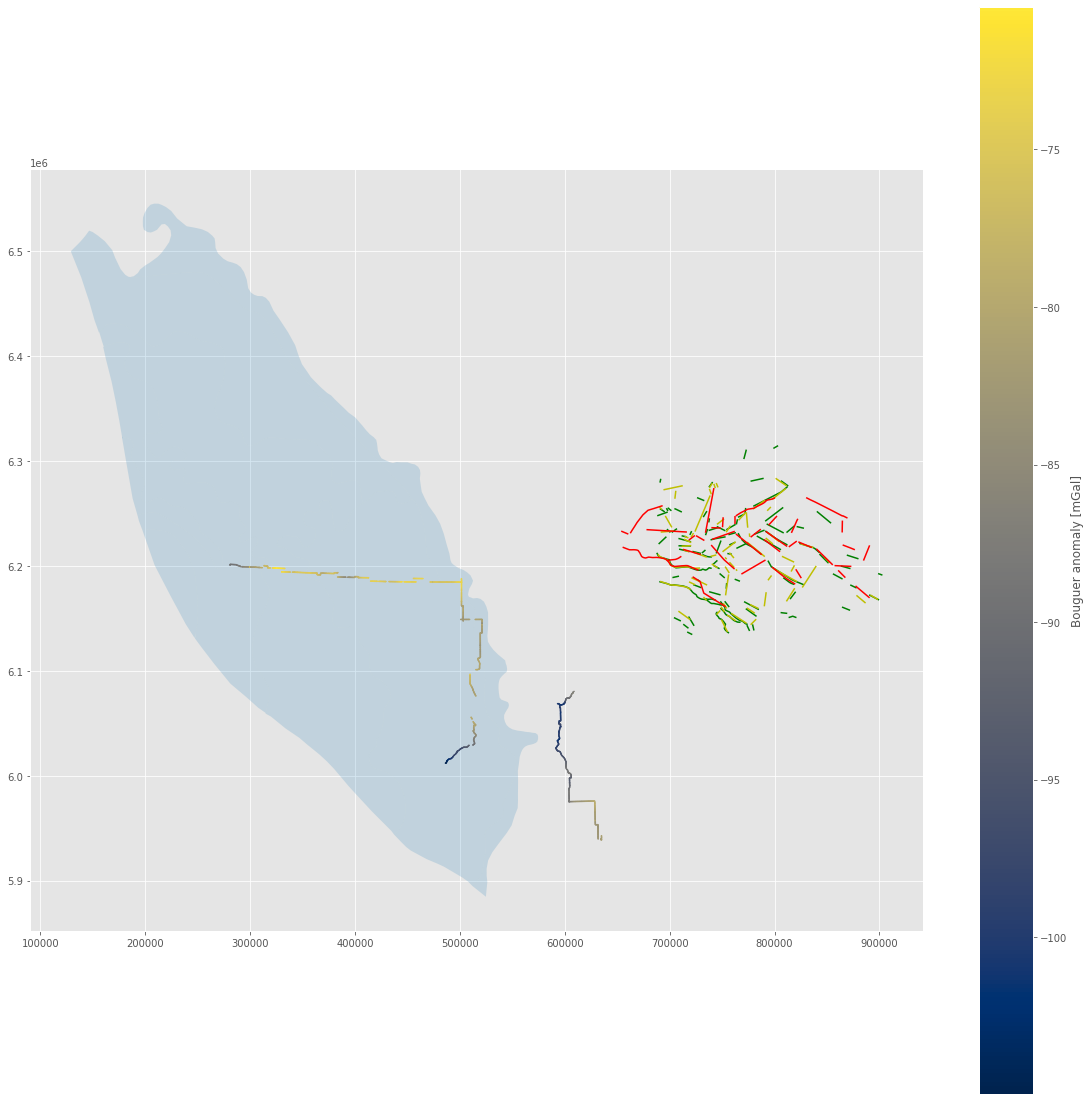

In [76]:
fig, ax = plt.subplots(figsize=(20,20))
points_subset = gpd.overlay(gravi_gdf_utm, lithoprobe)
montney.plot(ax=ax,alpha=0.2)
faults_bfsz.plot(ax=ax, color='g')
faults_montney.plot(ax=ax, color='y')
faults_debolt.plot(ax=ax, color='r')
im = ax.scatter(points_subset.easting, points_subset.northing, s=1, c=points_subset.BOUGUER, cmap='cividis')
cbar =fig.colorbar(im, ax=ax)
cbar.set_label("Bouguer anomaly [mGal]")
# points_subset.plot(ax=ax, column='BOUGUER',s=1, cmap='coolwarm')
# plt.colorbar(sc)
# plt.plot()

# print("Gravity measurements along the lithoprobe:", points_subset.shape[0])
# points_subset.to_file("lithoprobe_gravi_points.shp", driver="ESRI Shapefile")

We can visualize the gravity along the profile

In [77]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [78]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(points_subset, x='easting', y='northing', z='BOUGUER',color='BOUGUER')

fig.show()

In [79]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [80]:
points_subset_to_plot = points_subset[['easting','northing','BOUGUER']]
# points_subset_to_plot.iplot(x='easting',y='northing',z='BOUGUER',kind='plot')
# gravi_gdf_utm.head()

# gravi_gdf_utm.head()
# cf.datagen.sinwave(10,0.25).iplot(kind='surface')
# cf.datagen.sinwave(10,0.25).head()
# cf.datagen.sinwave(10,0.25).head()

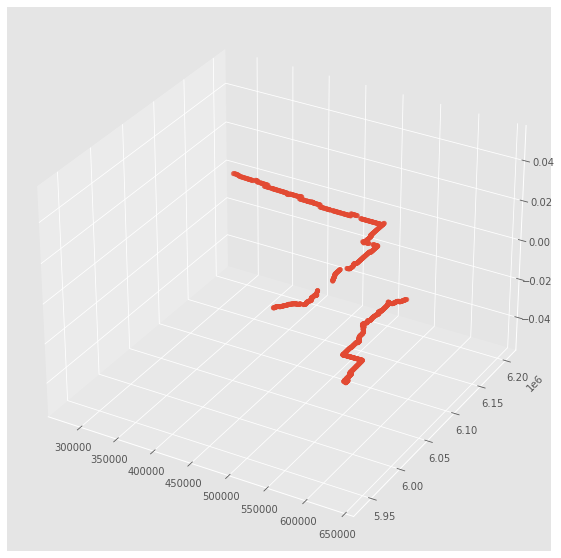

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_subset_to_plot.easting, points_subset_to_plot.northing)
# lithoprobe.exterior[0].coords
# ax.plot(lithoprobe_utm.geometry, lithoprobe_utm.geometry.Y)

In [82]:
from shapely.geometry import Point
# for index, row in lithoprobe.iterrows():
#      for pt in list(row['geometry'].exterior.coords): 
#         print(Point(pt))
# print(lithoprobe.columns)      
col = ['line_num','X','Y','BOUGUER']
nodes = gpd.GeoDataFrame(columns=col)

# extraction of nodes and attribute values nouveau GeoDataFrame
# for index, row in lithoprobe.iterrows():
#     for pt in list(row['geometry'].exterior.coords): 
#         nodes = nodes.append({'line_num': int(row['line_num']), 'geometry':Point(pt) },ignore_index=True)
# nodes.head(5)

In [83]:
# fig, ax = plt.subplots(3,2)
# ax.plot(111)
points_subset_to_plot.columns
# line11a = points_subset_to_plot[points_subset_to_plot['line_num'] == 'line11a']
# plt.subplot(221)
# plt.scatter(x = points_subset_to_plot.easting*points_subset_to_plot.northing, y=points_subset_to_plot.BOUGUER)
# plt.title('line11a')

# plt.subplot(222)
# plt.plot(points_subset_to_plot.cdp, points_subset_to_plot.BOUGUER)
# plt.title('line11b')

# plt.subplot(223)
# plt.plot(points_subset_to_plot.x, points_subset_to_plot.BOUGUER)
# plt.title('line12')

# plt.subplot(224)
# plt.plot(points_subset_to_plot.x, points_subset_to_plot.BOUGUER)
# plt.title('line13')

Index(['easting', 'northing', 'BOUGUER'], dtype='object')

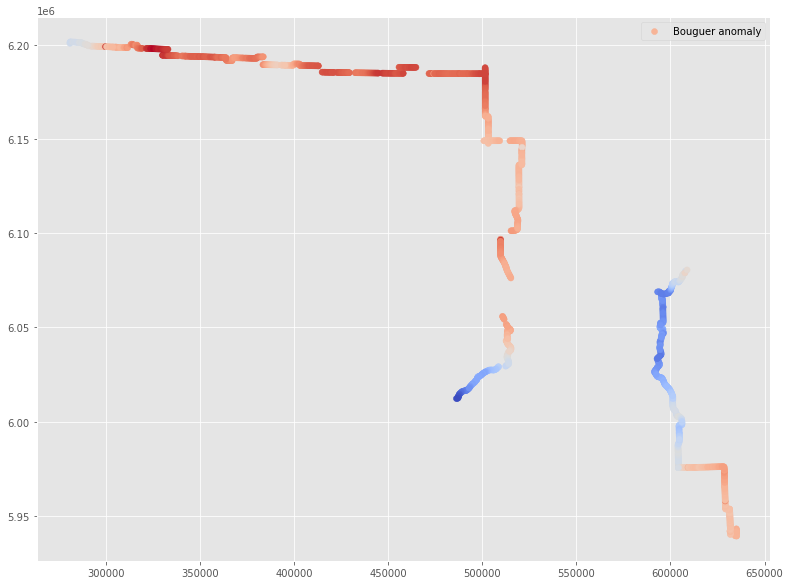

In [84]:
fig, ax = plt.subplots(figsize = (20, 10))
points_subset.plot(ax=ax, column='BOUGUER', cmap='coolwarm', label='Bouguer anomaly')

plt.legend()
# plt.colorbar(points_subset)
plt.grid(True)
plt.show()

DF shape (114, 26)


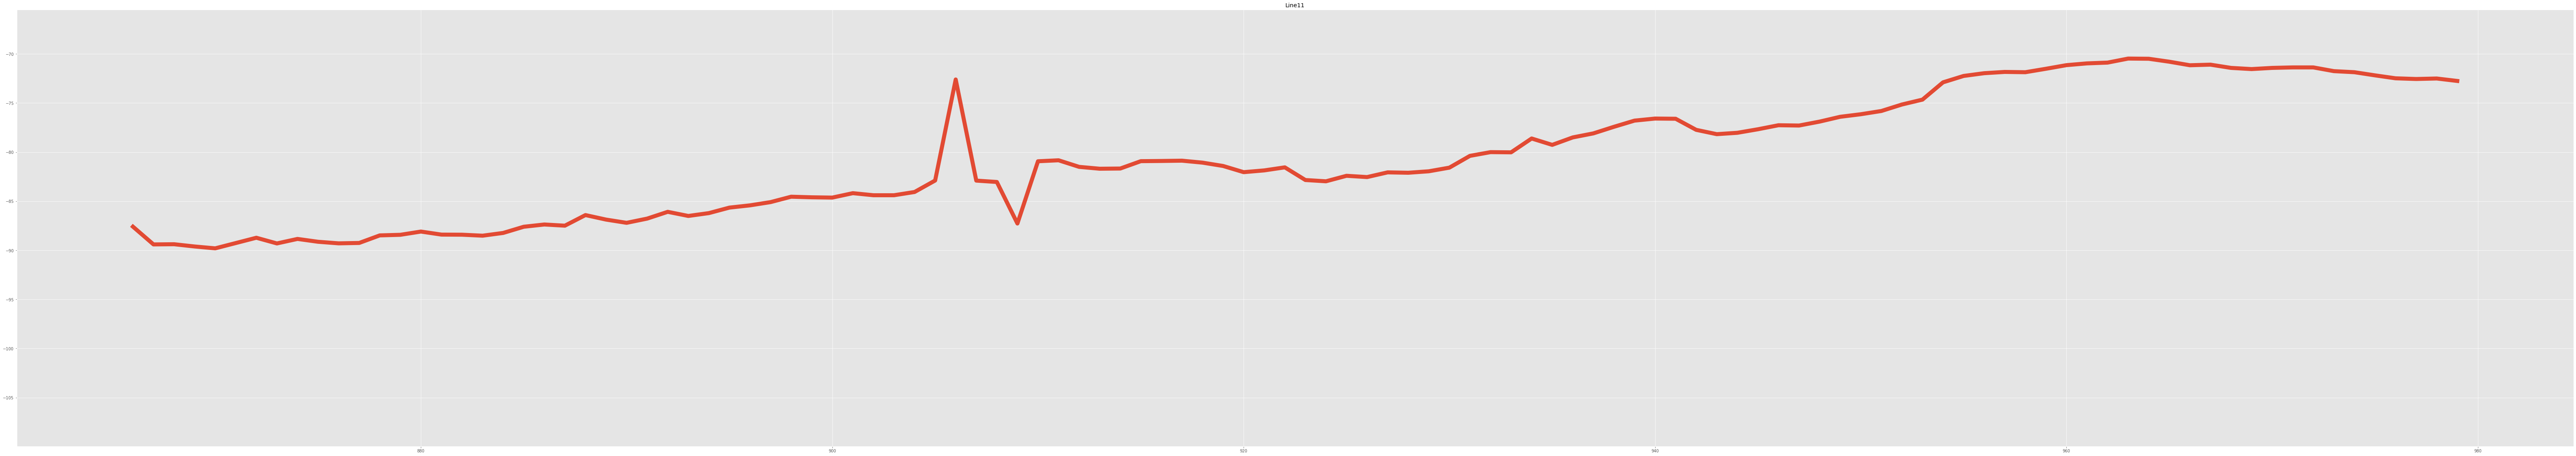

(1319, 26)


In [85]:
plt.style.use('ggplot')
# plt.subplots(figsize=(40,100))
# plt.plot(points_subset.index, points_subset.BOUGUER)
# labels = reversed(points_subset['line_num'].unique())
# points_subset.head()

line11A_df = points_subset[points_subset['line_num'] =='11']
line11B_df = points_subset[points_subset['line_num'] =='11B']
line12A_df = points_subset[points_subset['line_num'] =='12']

line12B_df = points_subset[points_subset['line_num'] =='12B']

line12C_df = points_subset[points_subset['line_num'] =='12C']

line12D_df = points_subset[points_subset['line_num'] =='12D']

line12X_df = points_subset[points_subset['line_num'] =='12X']

line12F_df = points_subset[points_subset['line_num'] =='12F']
def make_plot(line_num):
    df = points_subset[points_subset['line_num'] == line_num]
    xsize = df.shape[0]*1
    print("DF shape", df.shape)
    fig, ax =plt.subplots(figsize=(xsize,20))
    plt.ylim(min(points_subset.BOUGUER)-5, max(points_subset.BOUGUER)+5)
    plt.plot(df.index, df.BOUGUER, linewidth='10')
    plt.title('Line' + line_num)
    plt.show()
make_plot('11')
# print(min(points_subset.BOUGUER))
# plt.subplot(812)
# plt.plot(line11B_df.index, line11B_df.BOUGUER)
# plt.title("Line 11B")

# plt.subplot(813)
# plt.plot(line12A_df.index, line12A_df.BOUGUER)
# plt.title("Line 12A")

# plt.subplot(814)
# plt.plot(line12B_df.index, line12B_df.BOUGUER)
# plt.title("Line 12B")

# plt.subplot(815)
# plt.plot(line12C_df.index, line12C_df.BOUGUER)
# plt.title("Line 12C")

# plt.subplot(816)
# plt.plot(line12D_df.index, line12D_df.BOUGUER)
# plt.title("Line 12D")
# points_subset.line_num.unique()

# plt.subplot(223)
# plt.plot(line12_df.cdp, line12_df.Bouguer_anomaly)
# plt.title('line12')

# plt.subplot(224)
# plt.plot(line13_df.cdp, line13_df.Bouguer_anomaly)
# plt.title('line13')

# plt.show;
# line19B_df.head()

print(points_subset.shape)

# print(points_subset.line_num.unique())

In [103]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [137]:

import altair_saver
import altair as alt
import pandas as pd
import numpy as np

def make_interactive_plot(df, line_num):

    line_num=line_num
    df = points_subset[points_subset['line_num'].str.contains(line_num)]
    df['index'] = df.index

    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['easting'], empty='none')

    # The basic line
    line = alt.Chart(df).mark_line(interpolate='basis').encode(
        alt.Y('BOUGUER:Q',
        scale=alt.Scale(domain=(-90, -70))
        ),
        x='easting',
#         y='BOUGUER',

        color='line_num',
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(df).mark_point().encode(
        alt.Y('BOUGUER:Q',
        scale=alt.Scale(domain=(-90, -70))
        ),
        x='easting',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'easting', alt.value(' '))
    )

    # # Draw a rule at the location of the selection
    rules = alt.Chart(points_subset).mark_rule(color='gray').encode(
        alt.Y('BOUGUER:Q',
        scale=alt.Scale(domain=(-90, -70))
        ),
        x='easting',
    ).transform_filter(
        nearest
    )

    # # Put the five layers into a chart and bind the data
    chart = alt.layer(
        line, selectors, #text, points, rules, 
    ).properties(
        width=df.shape[0]*6, 
        title='Line ' + line_num,
    )
    return chart

# Lithoprobe
# line = alt.Chart(df).mark_line(interpolate='basis').encode(
#     x='easting',
# #     y='northing',
# )
line_num = '12'
chart = make_interactive_plot(df, line_num)
chart_name = "line_" + line_num
chart 
# chart.save(chart_name +'.json')
chart.save(chart_name + '_color.html')
# chart.save(chart_name, 'svg')
# chart.save('chart.png', scale_factor=2.0)

Example of tif files visualization in rasterio

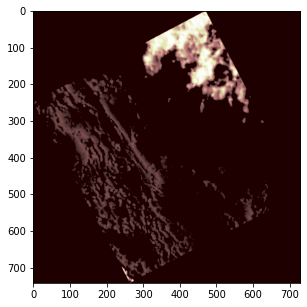

In [11]:
src = rasterio.open('data/Canada_GRAV_2km_Bouguer_GeoTIFF_clip_26910.tif') 

fig, ax = plt.subplots(figsize = (10, 5))
gravi = src.read()
plt.imshow(src.read(1), cmap='pink');

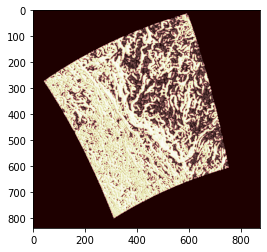

In [13]:
src = rasterio.open('data/Canada_GRAV_2km_Bouguer_GeoTIFF_clip_4326.tif') 

# fig, ax = plt.subplots(figsize = (10, 5))
# gravi = src.read()
plt.imshow(src.read(1), cmap='pink');